# Objectives

After completing this lab you will be able to:

 - Use Linear Regression in one variable to fit the parameters to a model
 - Use Linear Regression in multiple variables to fit the parameters to a model
 - Use Polynomial Regression in single variable tofit the parameters to a model
 - Create a pipeline for performing linear regression using multiple features in polynomial scaling
 - Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters


# Setup
For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

### Importing the dataset
Run the cell below to download the dataset into this environment.

This function will download the dataset into your browser


In [2]:

# Instead of using pyodide to download the data, use the requests library
import requests

def download(url, filename):
    """Downloads a file from a URL and saves it to a local file."""
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes
    with open(filename, "wb") as f:
        f.write(response.content)

file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"


download(file_path, "laptops.csv")
file_name="laptops.csv"
df = pd.read_csv(file_name, header=0)

In [3]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 : Single Linear Regression

You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.


In [6]:
lm= LinearRegression()

lm.fit(df[['CPU_frequency']], df[['Price']])

Yhat=lm.predict(df[['CPU_frequency']])

#Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?


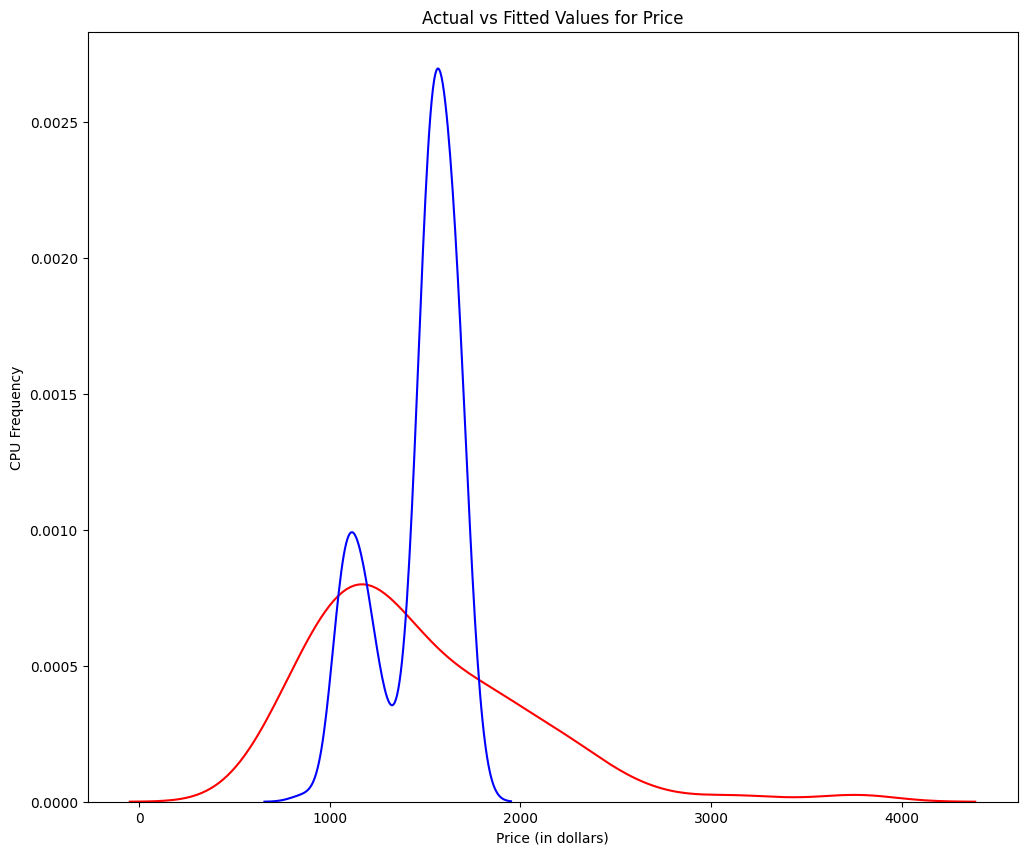

In [8]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('CPU Frequency')

plt.show()
plt.close()

#Evaluate the Mean Squared Error and R^2 score values for the model.


In [9]:
#MSE
mse = mean_squared_error(df['Price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)
#R^2
print('The R-square is: ', lm.score(df[['CPU_frequency']], df[['Price']]))

The mean square error of price and predicted value is:  284583.4405868629
The R-square is:  0.1344436321024326


# Task 2 - Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system.


In [27]:
Z= df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
Y= df[['Price']]

lm2= LinearRegression()
lm2.fit(Z, Y)
Yhat2=lm2.predict(Z)

#Plot the Distribution graph of the predicted values as well as the Actual values


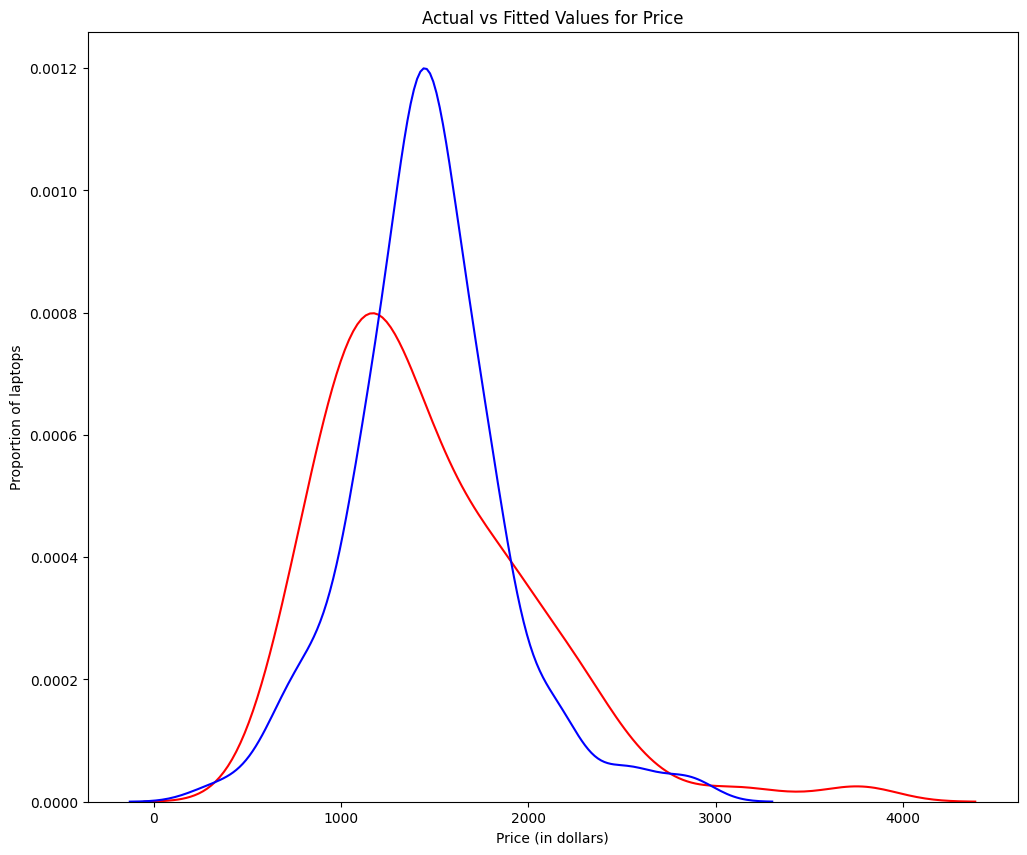

In [15]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat2, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of laptops')

plt.show()
plt.close()

#Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?


In [18]:
#MSE
mse = mean_squared_error(df['Price'], Yhat2)
print('The mean square error of price and predicted value is: ', mse)
#R^2
print('The R-square is: ', lm2.score(X, Y))

The mean square error of price and predicted value is:  161680.57263893107
The R-square is:  0.5082509055187374


#The Multiple Linear Regression model performs better than the Linear Regression model because it has both a lower Mean Square Error and a higher R-squared value, indicating better prediction accuracy and a stronger explanatory power

# Task 3 - Polynomial Regression
Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using `numpy.polyfit`.


In [21]:
X = df[['CPU_frequency']]
Y = df['Price']

X=X.to_numpy(). flatten()
f1 = np. polyfit(X, Y, 1)
p1= np. poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

In [22]:
#Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

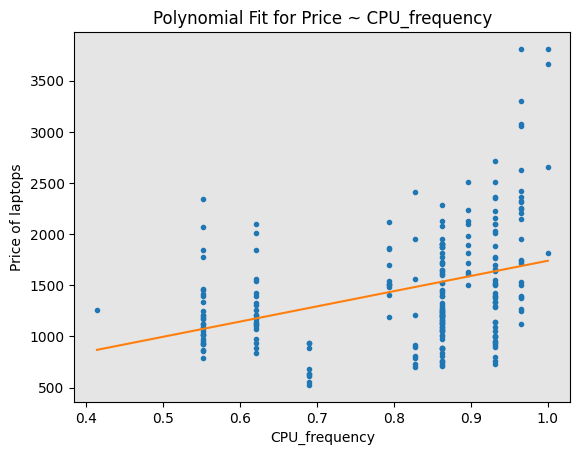

In [23]:
PlotPolly(p1, X, Y, 'CPU_frequency')

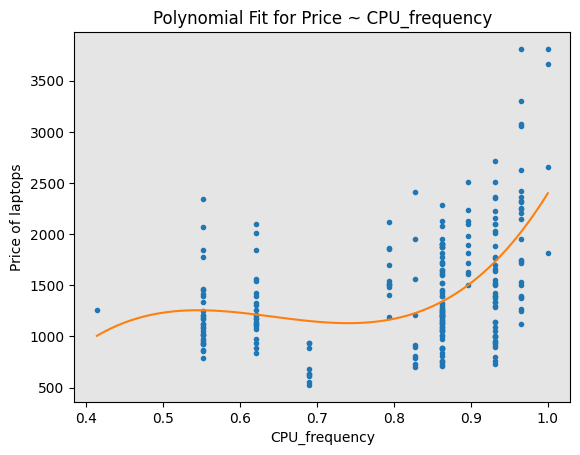

In [24]:
PlotPolly(p3, X, Y, 'CPU_frequency')

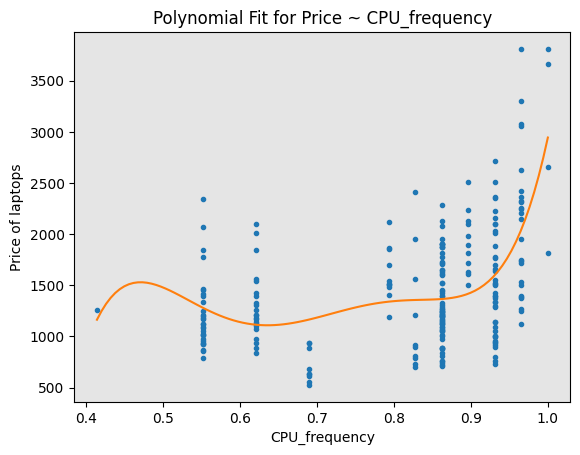

In [25]:
PlotPolly(p5, X, Y, 'CPU_frequency')

In [26]:
#Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.26692640796531175
The MSE value for 3rd degree polynomial is:  241024.86303848747
The R-square value for 5th degree polynomial is:  0.3030822706443108
The MSE value for 5th degree polynomial is:  229137.2954805611


# Task 4 - Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline.


In [29]:
#create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
#input the list as an argument to the pipeline constructor:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [30]:
Z = Z.astype(float)
pipe.fit(Z,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [31]:
# Similarly,  normalize the data, perform a transform and produce a prediction  simultaneously.
ypipe=pipe.predict(Z)
ypipe[0:4]

array([[1484.18227261],
       [ 778.36551848],
       [1267.81424349],
       [1009.69942066]])

In [33]:
#  Write your code below and press Shift+Enter to execute
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
ypipe[0:4]

array([[1484.18227261],
       [ 778.36551848],
       [1267.81424349],
       [1009.69942066]])

#Evaluate the MSE and R^2 values for the this predicted output.


In [36]:
r_squared_pipe = r2_score(Y, ypipe)
print('The R-square value for 1st degree polynomial is: ', r_squared_pipe)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y, ypipe))

The R-square value for 1st degree polynomial is:  0.6332094535859659
The MSE value for 1st degree polynomial is:  120595.8612802837


#We should now have seen that the values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value.


#End of the task